In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
df['PassengerId'].duplicated().sum()

0

In [ ]:
df['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
df.dropna(subset=['Embarked'], inplace=True)

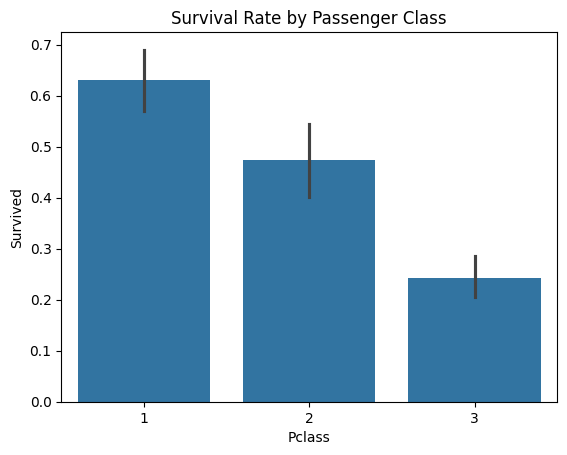

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [ ]:
df['total FamilySize'] = df['SibSp'] + df['Parch']
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_test=pd.read_csv('/content/tested.csv' )

df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_test['Age'].fillna((df_test['Age']).median(),inplace=True)

In [ ]:
df_test['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
df_test['Fare'].dropna(inplace=True)

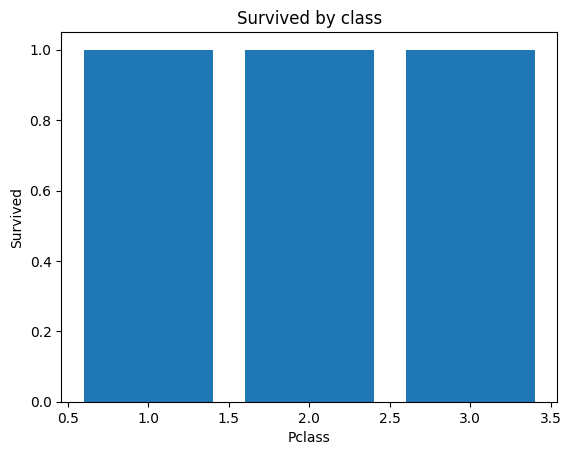

In [ ]:


# Assuming 'Survived' column exists in df_test, correct the typos:
plt.bar(x=df_test['Pclass'], height=df_test['Survived'])
plt.title('Survived by class')
plt.xlabel('Pclass')
plt.ylabel('Survived') # Corrected typo: plt,ylabel to plt.ylabel
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the datasets
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/tested.csv')

# Feature selection and preprocessing
X = df_train.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
y = df_train['Survived']
# Remove 'Survived' column from X_test before imputation
X_test = df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])

# Convert object (string) columns to numerical using LabelEncoder
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        label_encoders[col] = LabelEncoder()
        combined_data = pd.concat([X[col], X_test[col]], axis=0)
        label_encoders[col].fit(combined_data)
        X[col] = label_encoders[col].transform(X[col])
        X_test[col] = label_encoders[col].transform(X_test[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns) # Now X_test has the same columns as X during fit

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = logreg_model.predict(X_val)

# Evaluate the model on the validation set
print("Accuracy on validation set:", accuracy_score(y_val, val_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_predictions))
print("Classification Report:\n", classification_report(y_val, val_predictions))

# Function to predict survival for a given PassengerId
def predict_survival(passenger_id):
    # Find the row corresponding to the PassengerId in the test dataset
    passenger_row = df_test[df_test['PassengerId'] == passenger_id]

    if passenger_row.empty:
        return "PassengerId not found in the test dataset."

    # Drop PassengerId, Name, Ticket, and Cabin as they are not features
    passenger_row = passenger_row.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived']) # Also drop 'Survived' here

    # Preprocess the row in the same way as the training data
    for col in passenger_row.columns:
        if passenger_row[col].dtype == 'object':
            passenger_row[col] = label_encoders[col].transform(passenger_row[col])

    # Impute missing values in the row
    passenger_row = pd.DataFrame(imputer.transform(passenger_row), columns=passenger_row.columns)

    # Predict survival
    prediction = logreg_model.predict(passenger_row)

    return "Survived" if prediction[0] == 1 else "Did not survive"

# Example usage
passenger_id = 895  # Replace with the PassengerId you want to predict
result = predict_survival(passenger_id)
print(f"Passenger {passenger_id} will {result}.")

Accuracy on validation set: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Passenger 895 will Did not survive.
